In [1]:
import pandas as pd

DATADIR = '../data/'
FILENAME = 'main_data.csv'

In [2]:
df = pd.read_csv(DATADIR + FILENAME)
df

,Block#,InvalidTxs,GasUsed,GasWasted
0,12001003,1,12491719,187446
1,12001078,1,12468309,257378
2,12001089,1,12471808,257378
3,12001100,1,12493638,412944
4,12001156,1,12481895,28272
...,...,...,...,...
117453,13131590,1,30053760,240111
117454,13131597,3,22751128,328623
117455,13131618,1,8357102,33292
117456,13131622,1,29847921,329134


In [3]:
df['WastePerc'] = (df['GasWasted'] / df['GasUsed']) * 100

In [4]:
df.sort_values(by=['GasWasted'])

,Block#,InvalidTxs,GasUsed,GasWasted,WastePerc
101973,12868978,1,14986007,0,0.000000
109469,12992669,1,19757808,0,0.000000
26672,12216839,1,12516409,0,0.000000
73825,12593820,1,14951621,0,0.000000
28856,12237561,1,12460653,1,0.000008
...,...,...,...,...,...
112847,13054098,1,29998505,27933869,93.117537
111360,13026507,1,29851158,27937955,93.590858
112780,13053079,1,29923388,27984448,93.520319
117178,13124313,1,29998780,28464111,94.884229


In [5]:
df['GasUsed'].mean()


14760118.380450884

In [6]:
df['GasWasted'].mean()


251523.45810417342

In [7]:
df['WastePerc'].mean()

1.7999203000185717

In [8]:
df['WastePerc'].describe()

count    117458.000000
mean          1.799920
std           4.788409
min           0.000000
25%           0.295164
50%           0.611801
75%           1.449899
max          96.646942
Name: WastePerc, dtype: float64

In [9]:
df[df['WastePerc'] > 2].sort_values(by=['WastePerc'])

,Block#,InvalidTxs,GasUsed,GasWasted,WastePerc
102851,12882718,1,14310670,286232,2.000130
109476,12992896,1,26956457,539180,2.000189
57999,12456967,3,15013527,300319,2.000323
10778,12086209,2,12475185,249562,2.000467
49151,12376262,2,14993893,299950,2.000481
...,...,...,...,...,...
96379,12805675,1,14937737,14207831,95.113678
50481,12389243,2,14939719,14251807,95.395415
78513,12625718,1,14856831,14209581,95.643418
64491,12512474,2,14987972,14353451,95.766465


array([[<AxesSubplot:title={'center':'WastePerc'}>]], dtype=object)

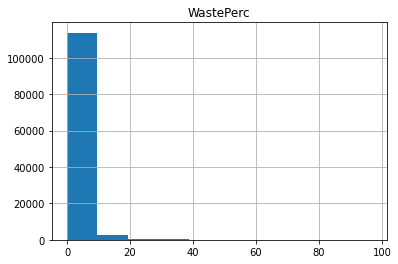

In [10]:
df.hist(column='WastePerc')

<AxesSubplot:ylabel='Gas Wasted by INVALID OPcode'>

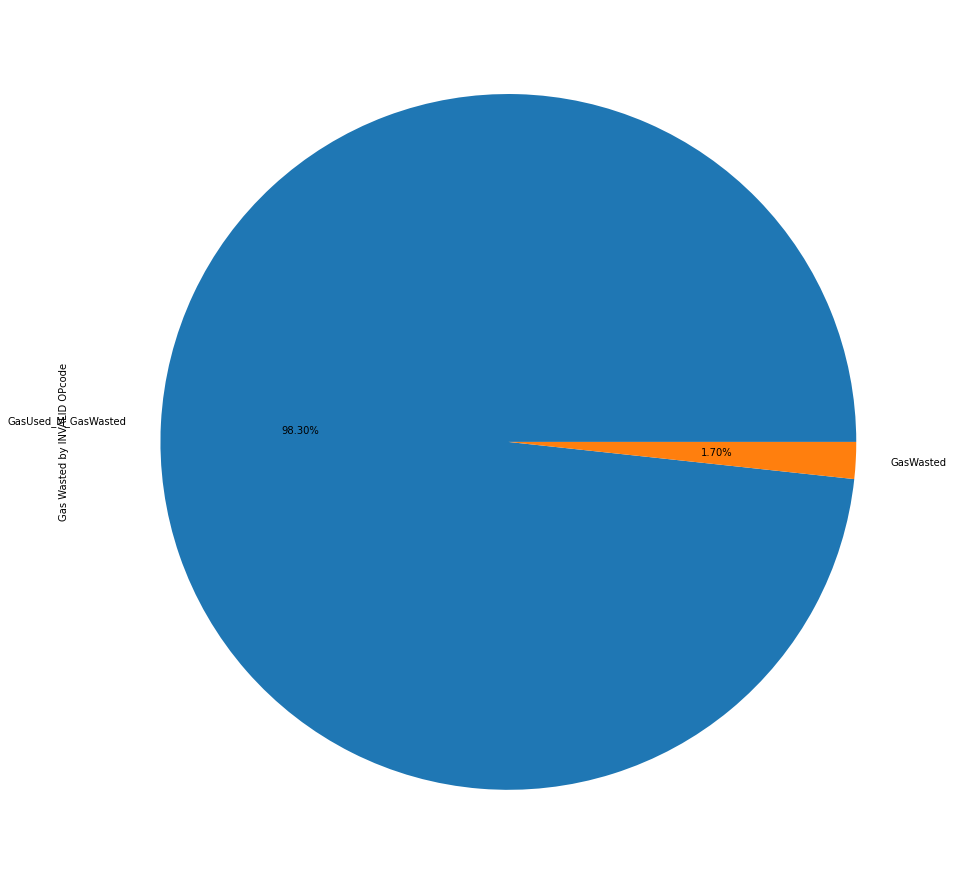

In [11]:
def autopct(pct):
    return ('%.2f' % pct) + "%" if pct > 0 else ''
df['GasUsed_M_GasWasted'] = df['GasUsed'] - df['GasWasted']
df[['GasUsed_M_GasWasted', 'GasWasted']].sum().plot(kind='pie', label='Gas Wasted by INVALID OPcode', figsize=(16,16), autopct=autopct)